In [1]:
!tesseract --version

tesseract v5.3.0.20221222
 leptonica-1.78.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.3) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE4.1
 Found libarchive 3.5.0 zlib/1.2.11 liblzma/5.2.3 bz2lib/1.0.6 liblz4/1.7.5 libzstd/1.4.5
 Found libcurl/7.77.0-DEV Schannel zlib/1.2.11 zstd/1.4.5 libidn2/2.0.4 nghttp2/1.31.0


In [2]:
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (2):
eng
osd


In [3]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [4]:
!tesseract --help-oem

OCR Engine modes:
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.


In [5]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pytesseract
import download
from extract import unsharp, thresh, gray, scale, blur, extract_text

In [6]:
def show(image):
    plt.figure(figsize = (20,10))
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation='nearest')
    plt.show()

def tess(image):
    show(image)
    print(extract_text(image))

https://youtu.be/Oevq2aSOs0M

In [7]:
# Oevq2aSOs0M 720 727
src = download.get_frame('E8h_hW_0YRA', 2030)

In [8]:
src.shape

(480, 768, 3)

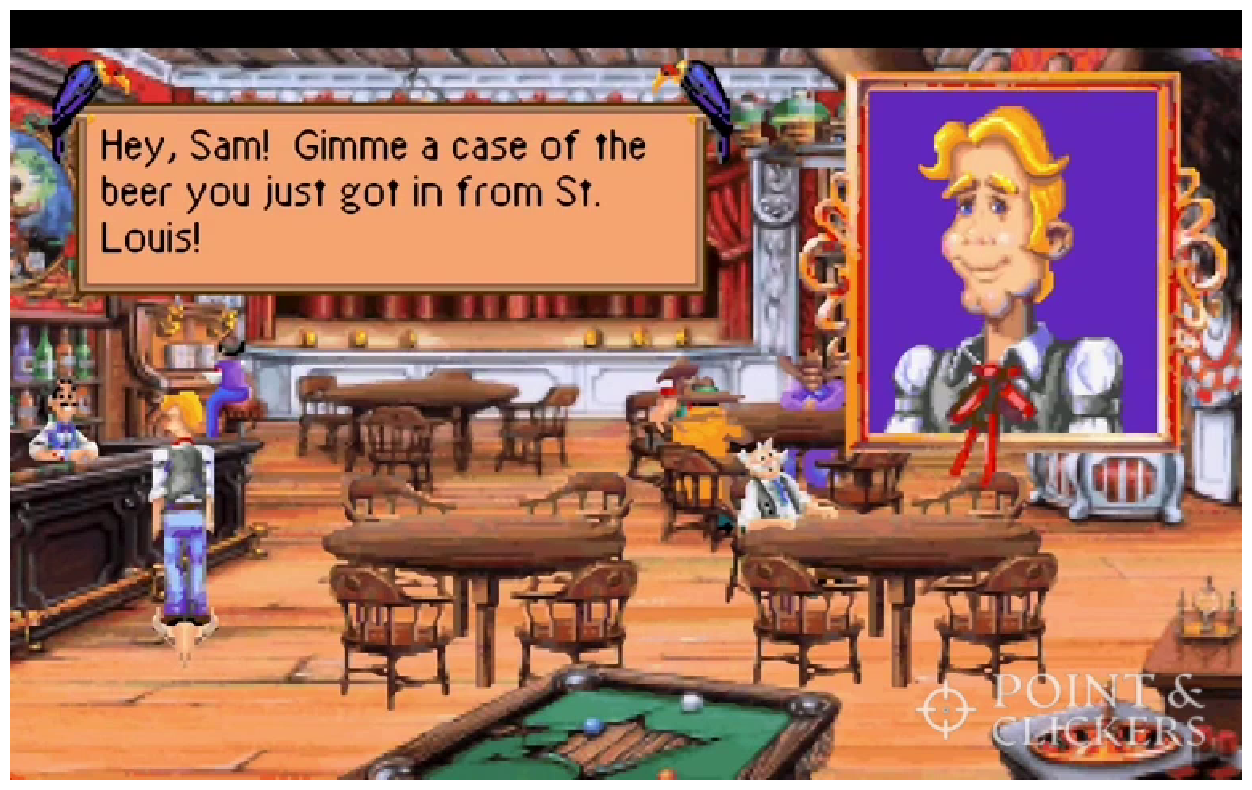

S| Hey, Sam! Gimme a case of the |p
beer you just got in from St.
Louis!

a...
Ss



In [9]:
tess(src)

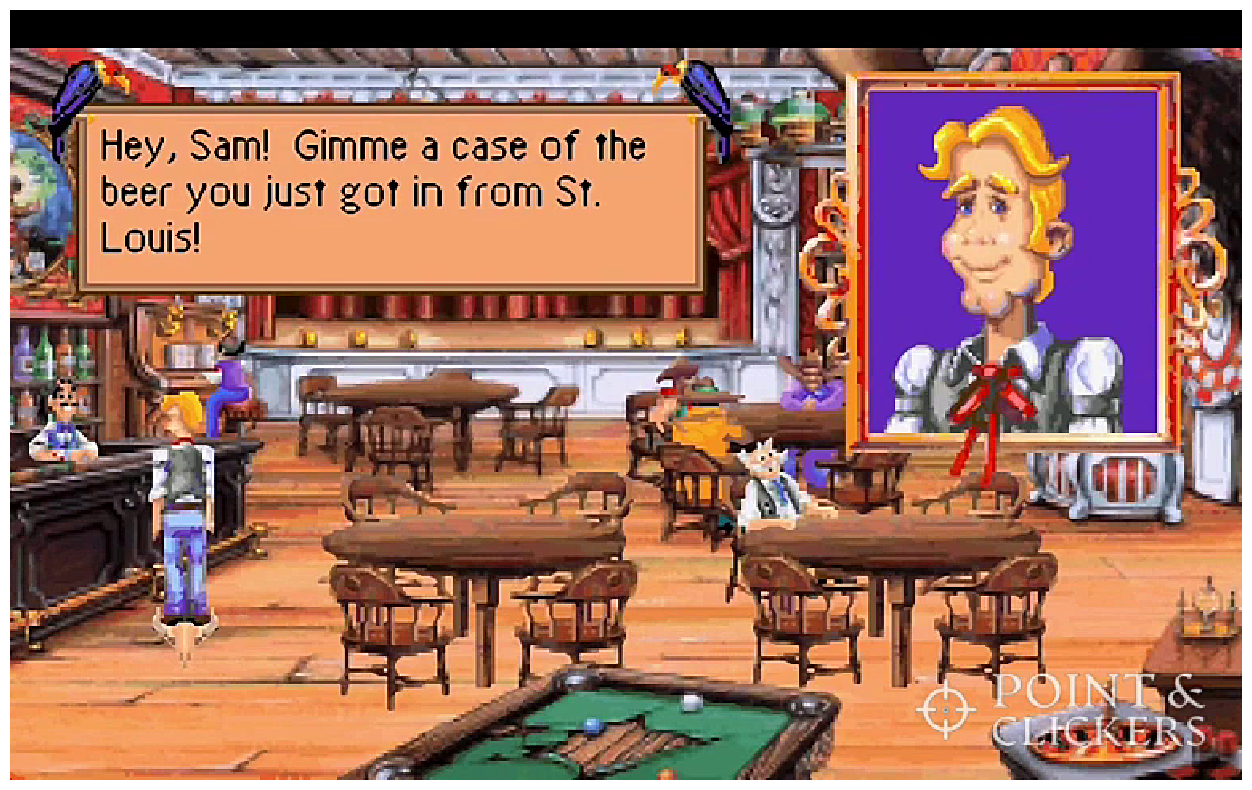

In [10]:
tess(unsharp(src))

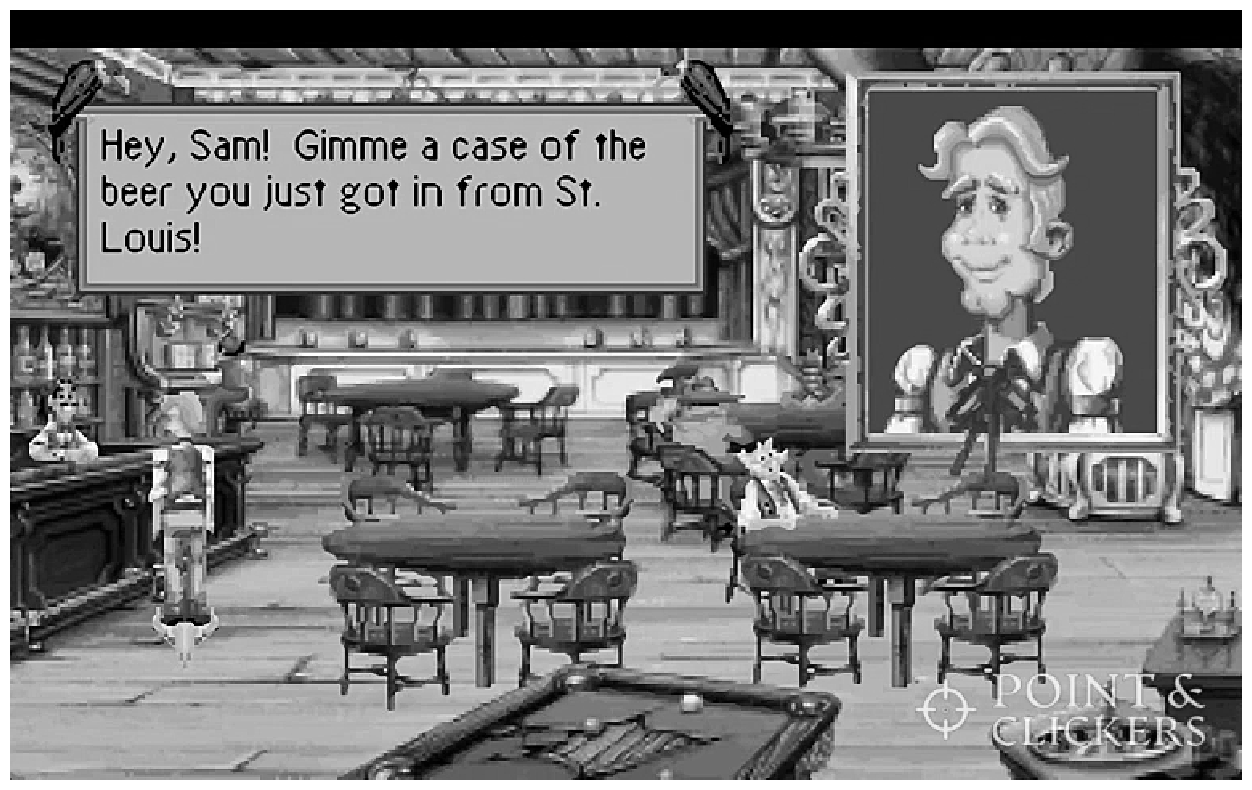

In [11]:
tess(gray(unsharp(src)))

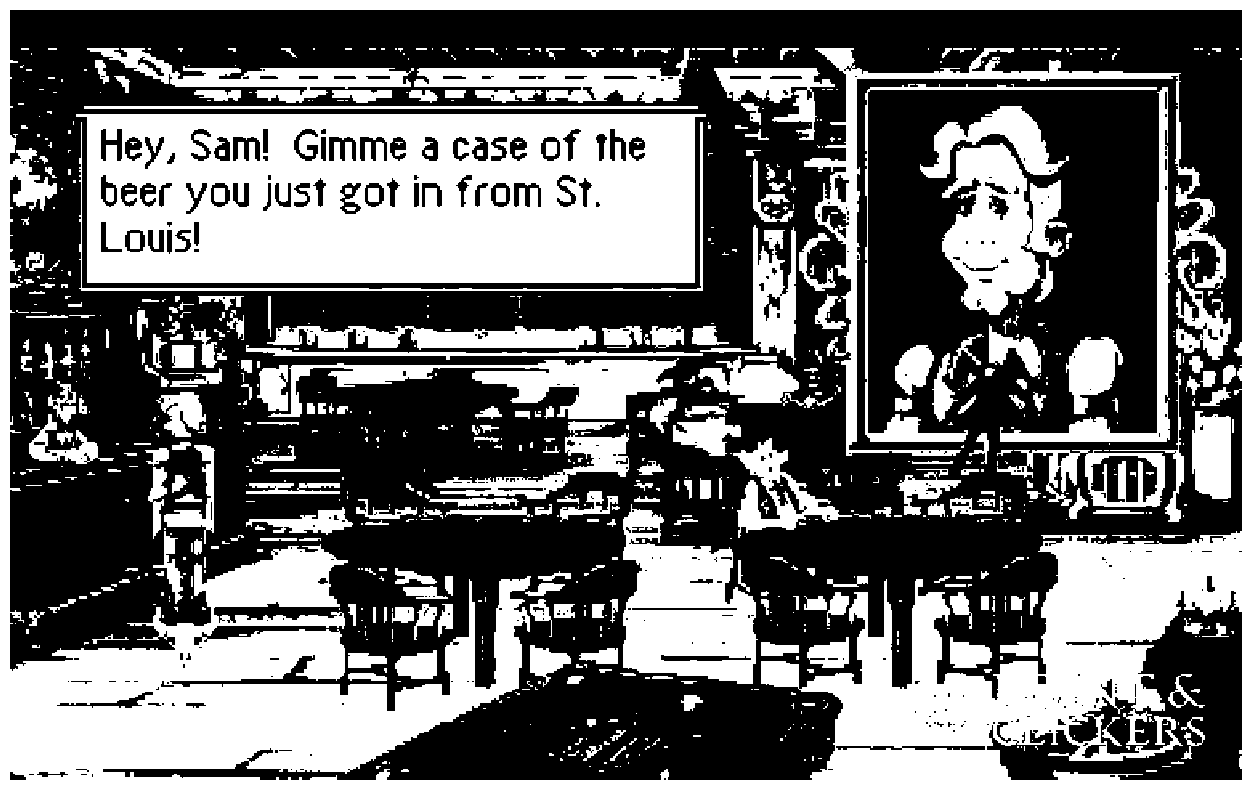

In [12]:
tess(thresh(gray(unsharp(src))))

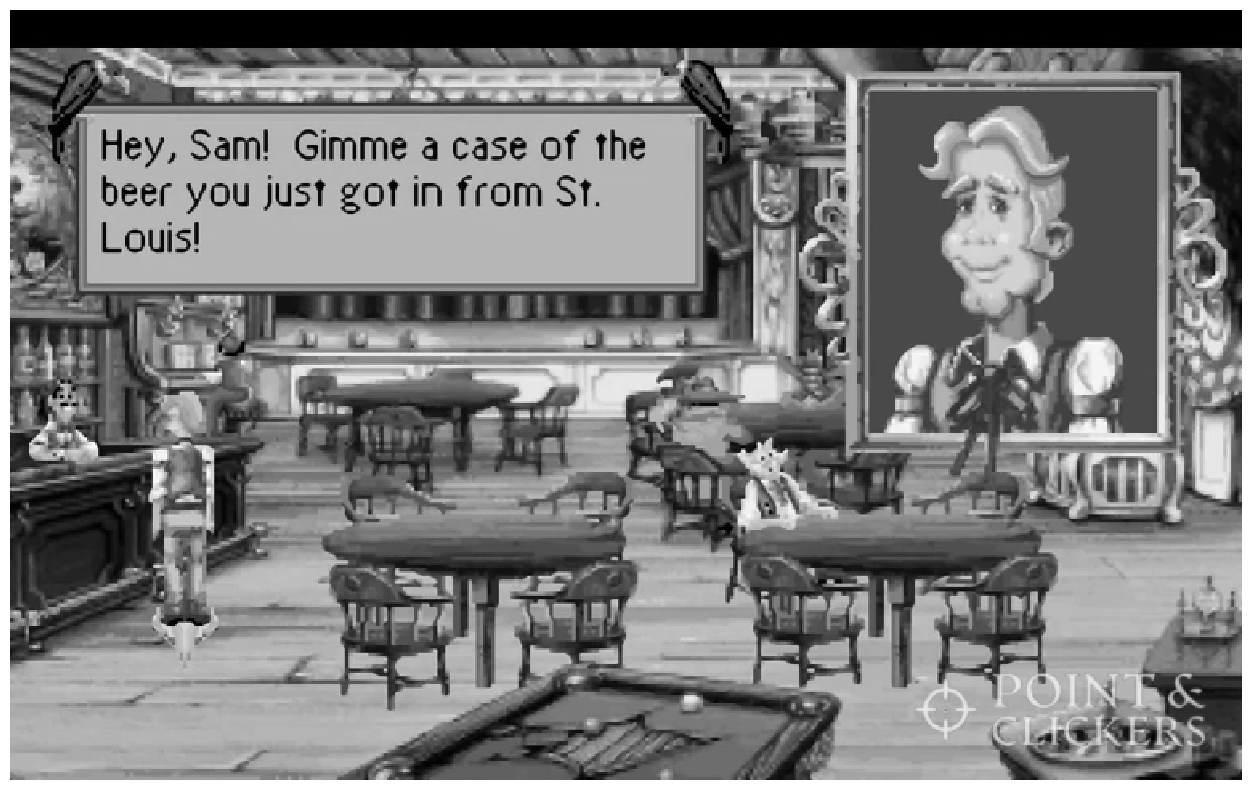

“Wj Hey, Sam! Gimme a case of the
) beer you just got in from St.
Louis!




In [13]:
tess(gray(src))

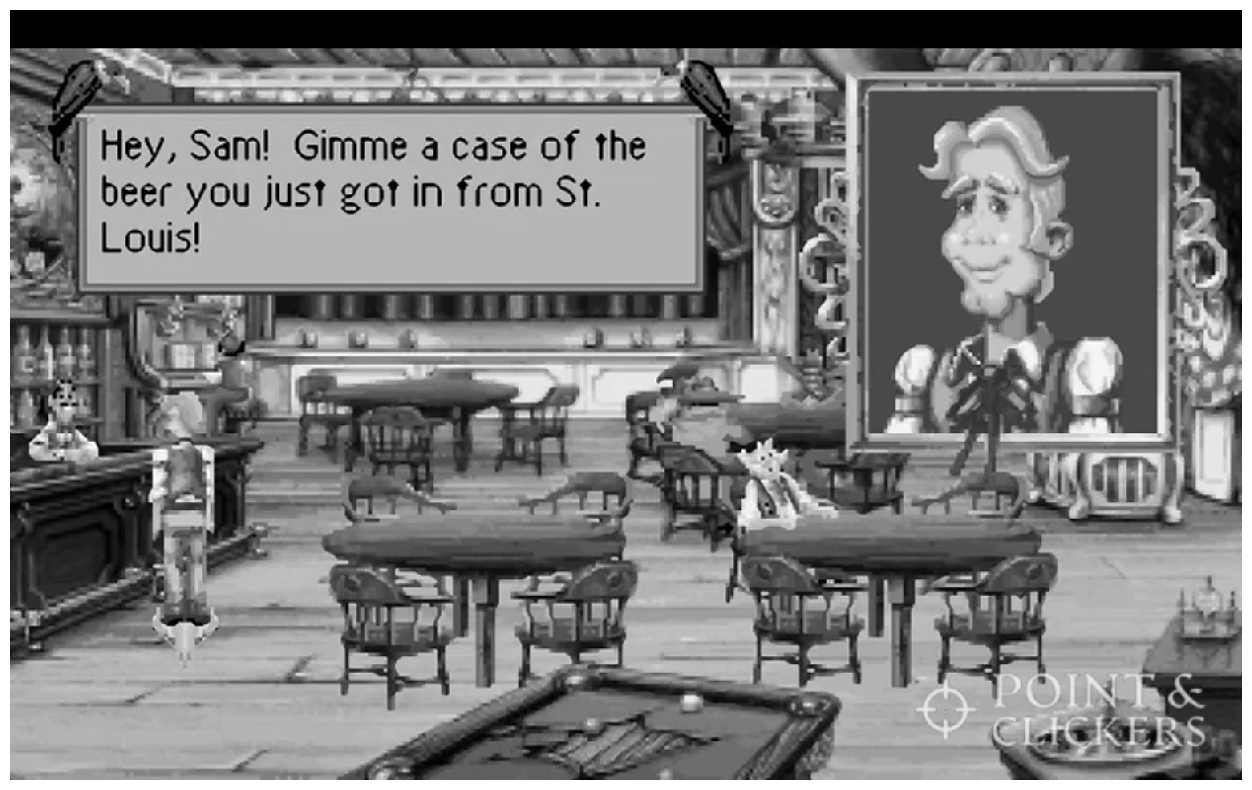

5 H| Hey, Sam! Gimme acase of the [
} beer you just got in from St.




In [14]:
tess(scale(2, gray(src)))

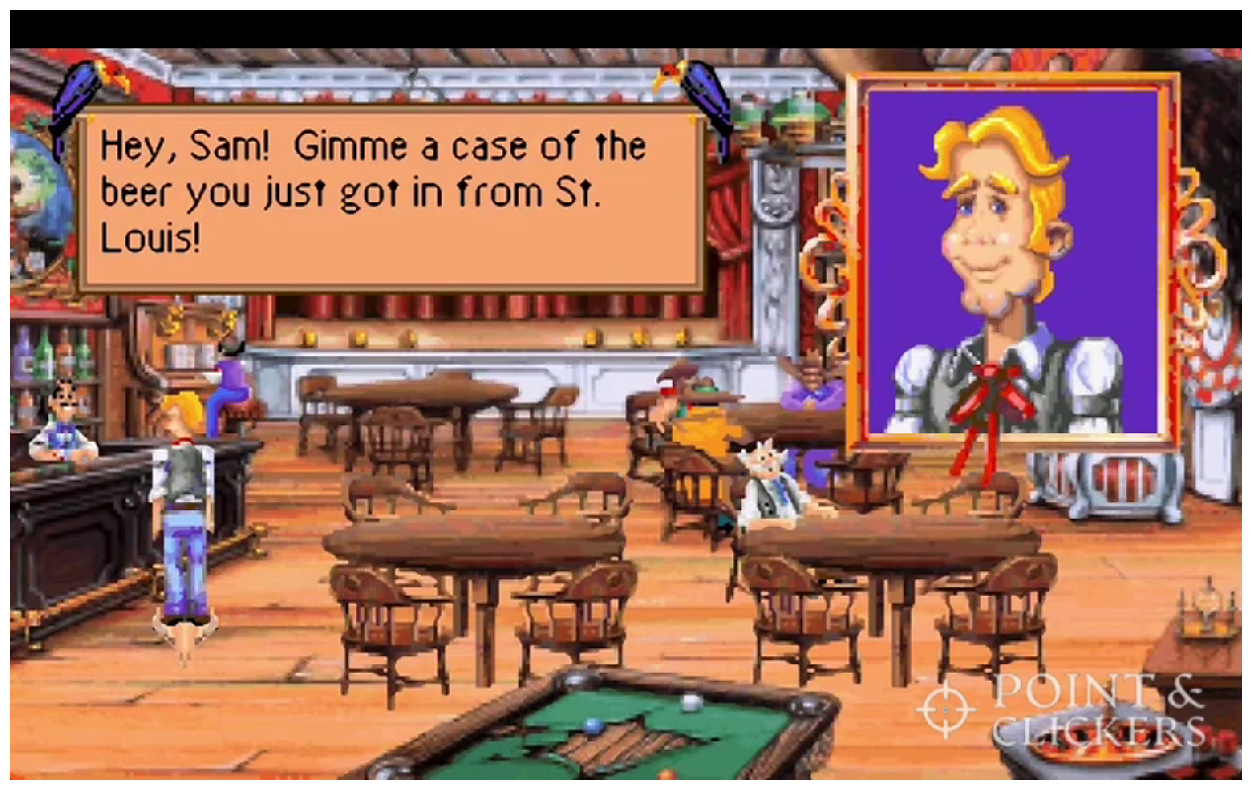

ey, Sam! Ginme a case of the
beer you just got in from St.




In [15]:
tess(scale(2, src))

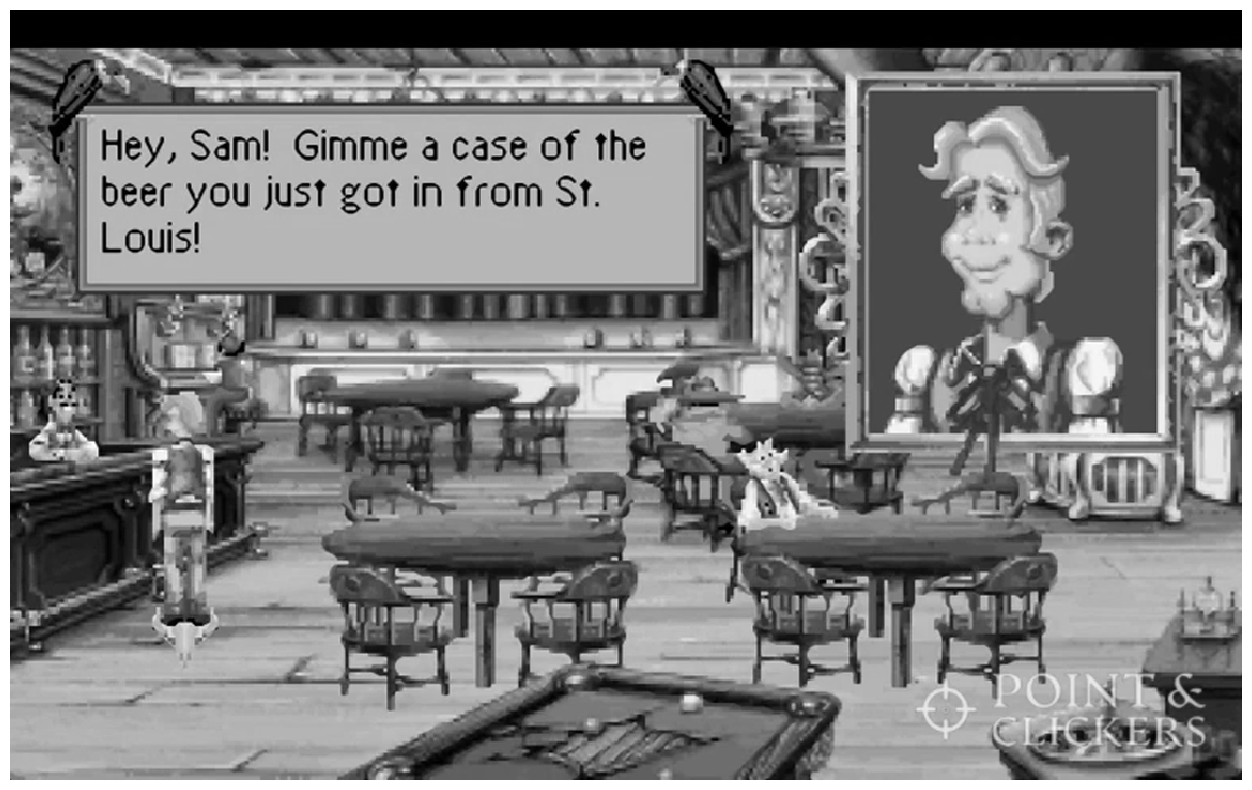

= is

4) Hey, Sam! Gimme a case of the
} beer you just got in from St.




In [16]:
tess(scale(1.5, gray(src)))

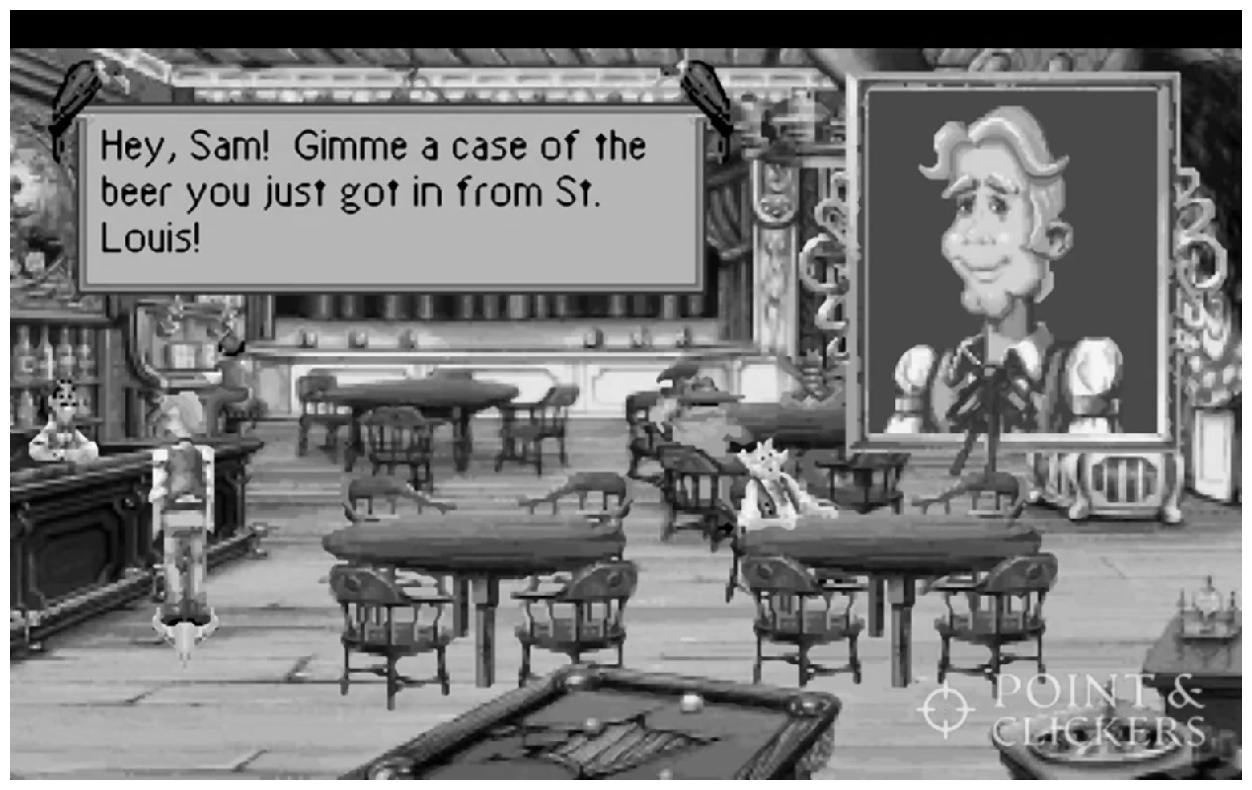

Yi) Hey, Sam! Shic acaseof the |
: beer you just got in from St.




In [17]:
tess(blur(scale(2, gray(src))))

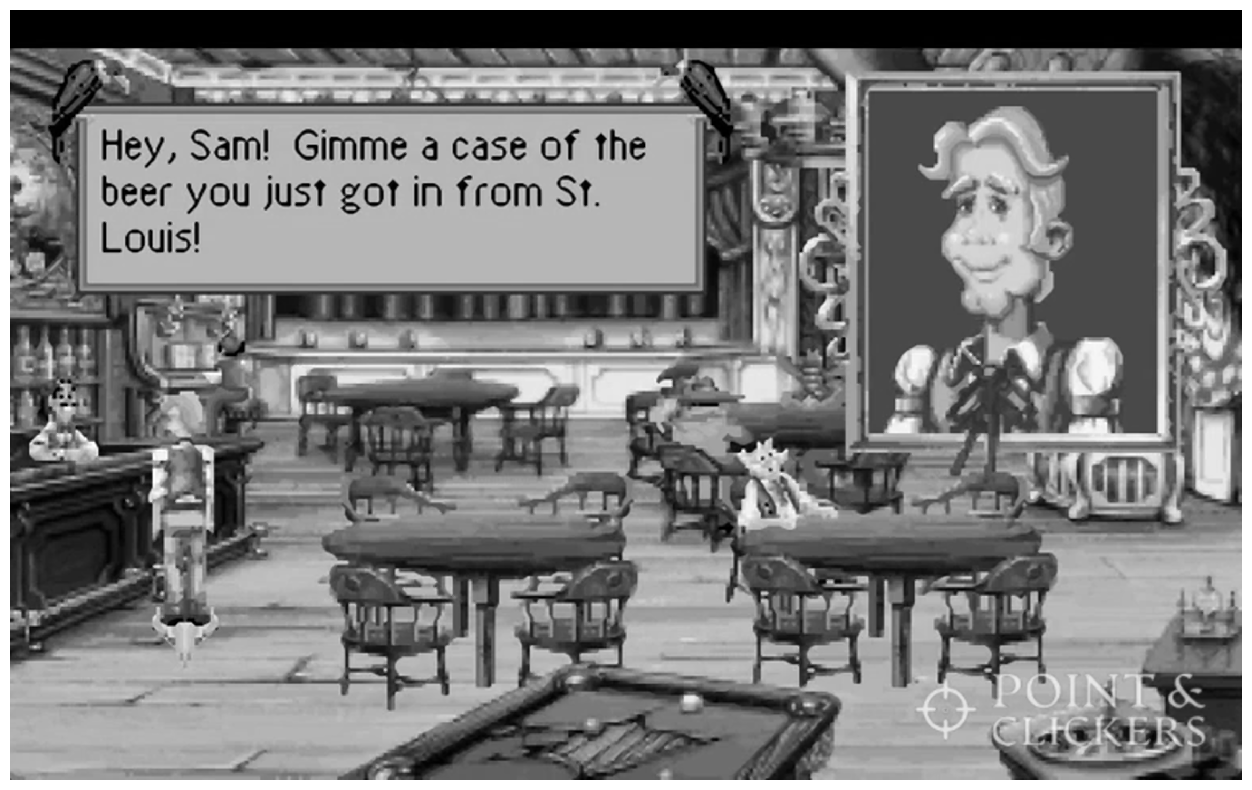

“i Hey, Sam! Gimme a case of the
» >) beer you just got in from St.




In [18]:
tess(blur(scale(3, gray(src))))

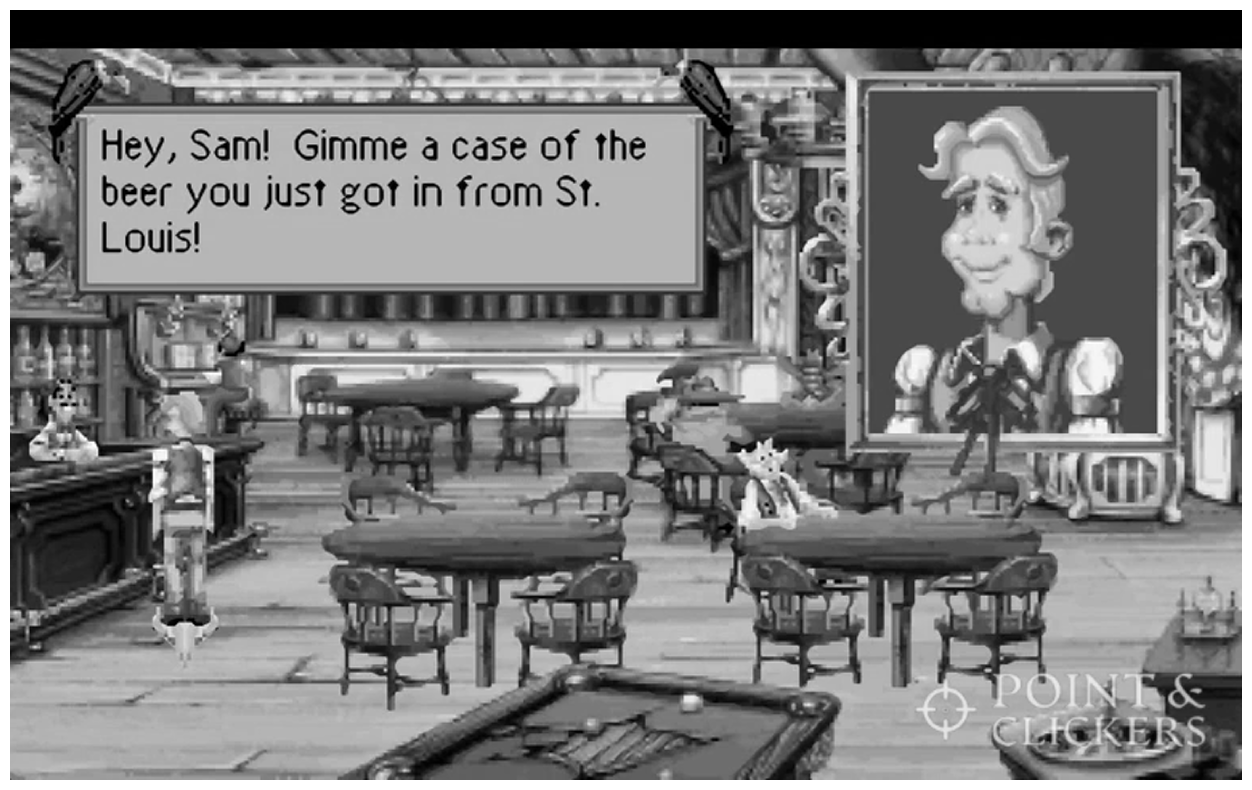

In [19]:
tess(blur(scale(6, gray(src))))

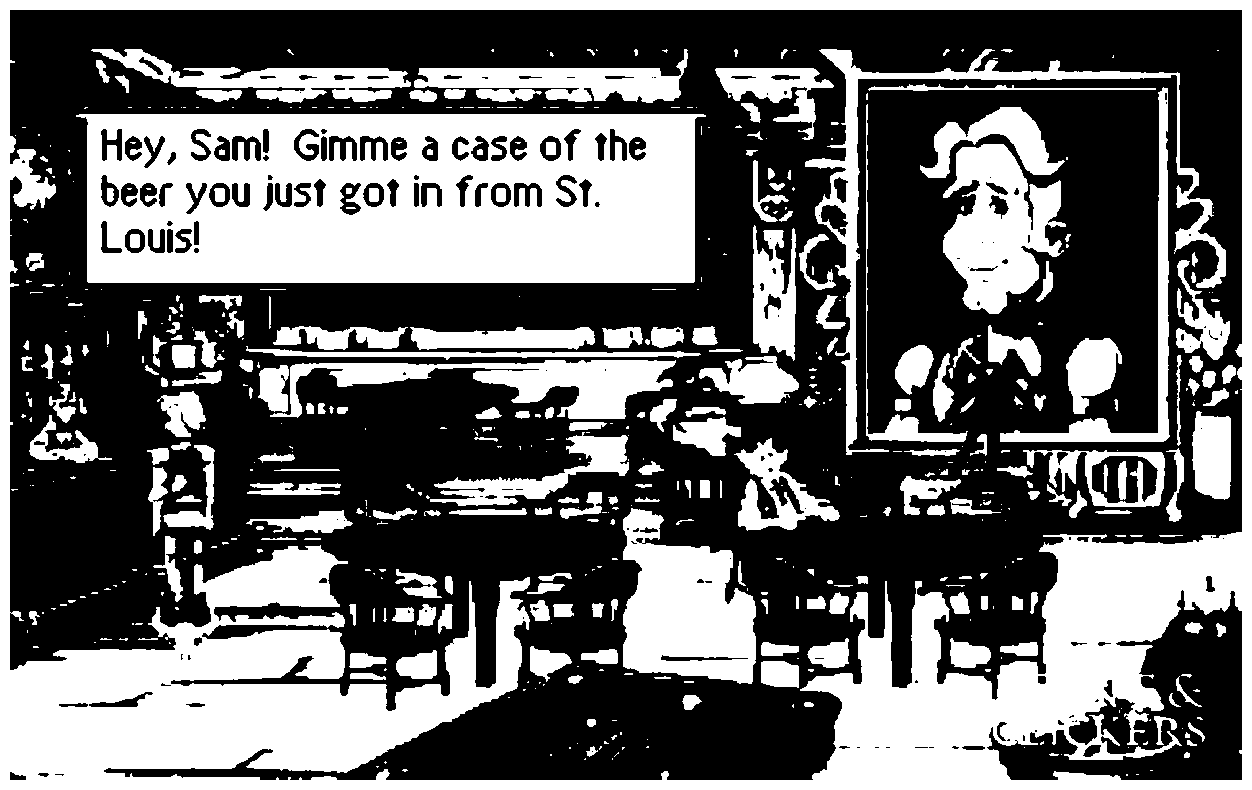

In [20]:
tess(thresh(blur(scale(3, gray(src)))))

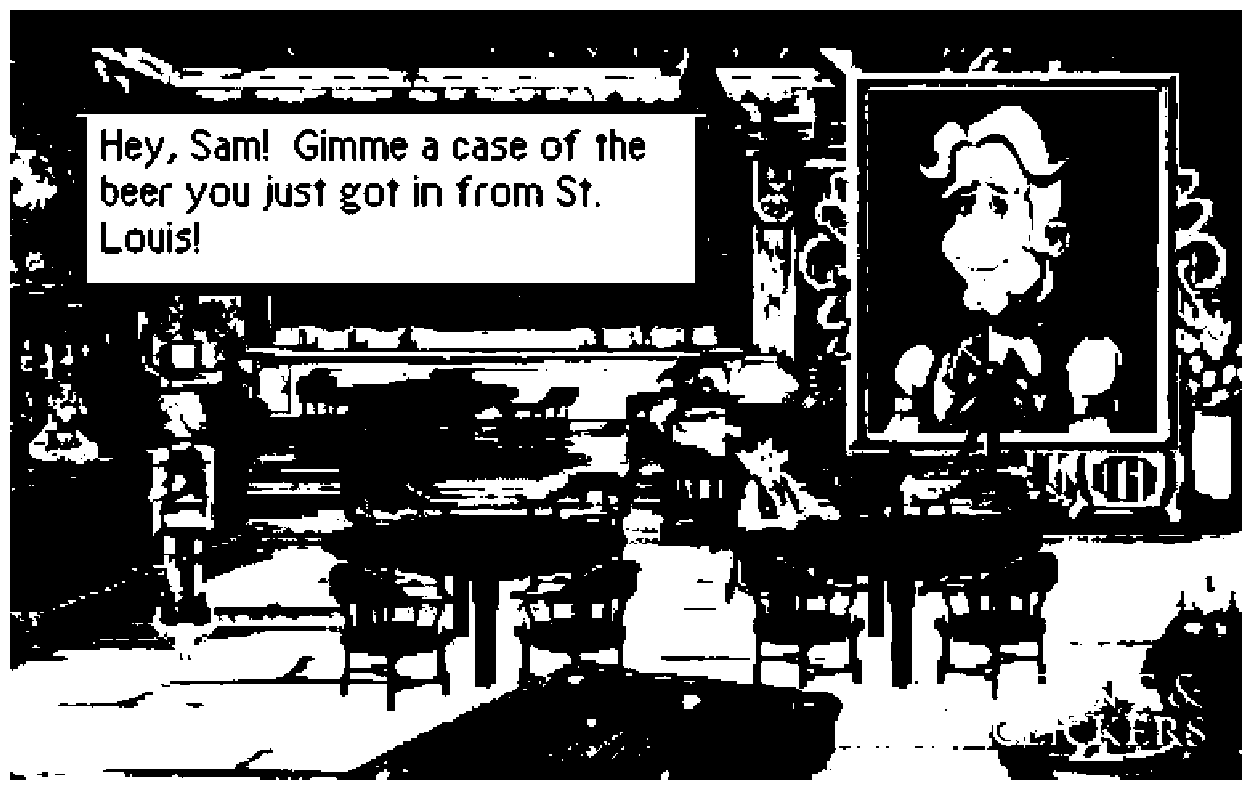

In [21]:
tess(thresh(gray(src)))

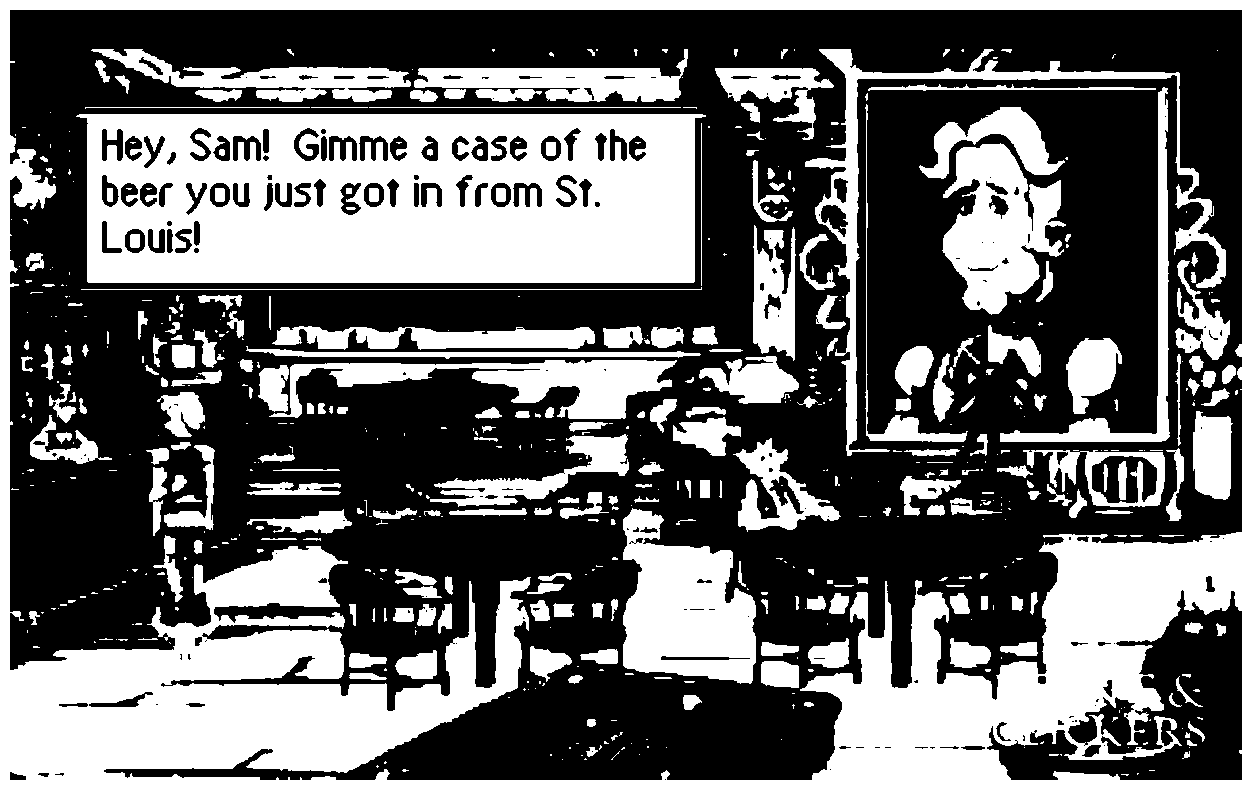

=e ~® we een

Page Hey, Sam! Gimme acase of the im
Si a beer you just got in from St.



In [22]:
tess(thresh(scale(6, gray(src))))

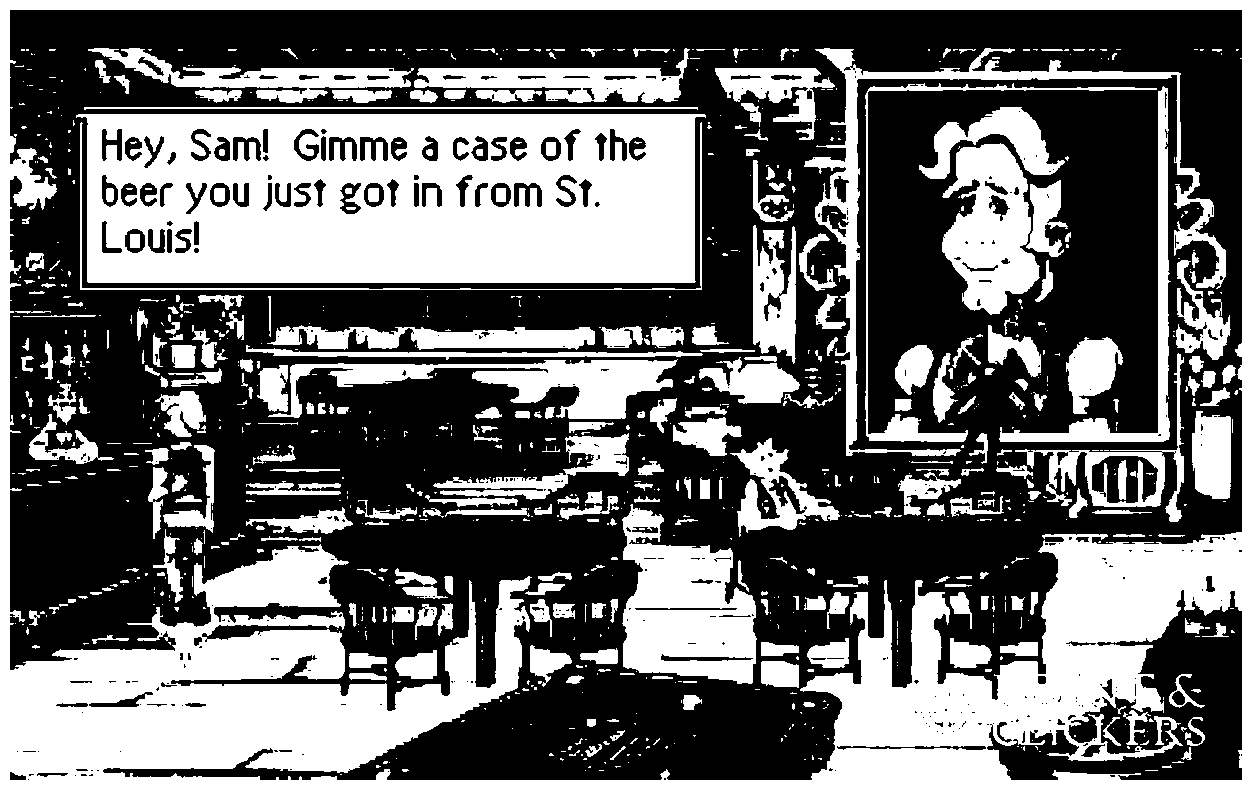

me Hey, Sam! Gimme a case of the |
al beer you just got in from St.

rs
ap
: = neath




In [23]:
tess(thresh(scale(3, unsharp(gray(src)))))